# House Kaggle Challenge, predicting Sale Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [7]:
data=pd.read_csv('/Users/chloeguiver/code/Cguiver26/House_Kaggle/train.csv')
test=pd.read_csv('/Users/chloeguiver/code/Cguiver26/House_Kaggle/test.csv')

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
#defining X and y
X = data.drop(columns=['SalePrice'])
y = data.SalePrice
X.shape

(1460, 80)

## EDA

In [10]:
#checking for duplicates that could cause data leakage
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [15]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

__Missing Values__

In [16]:
print(train.shape)

# Number of missing values in each column of training data
missing_count=X.isnull().sum().sort_values(ascending=False)
missing_count[missing_count>0]

(1460, 80)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Heatmap to visualise the blank values in the dataset

<AxesSubplot:>

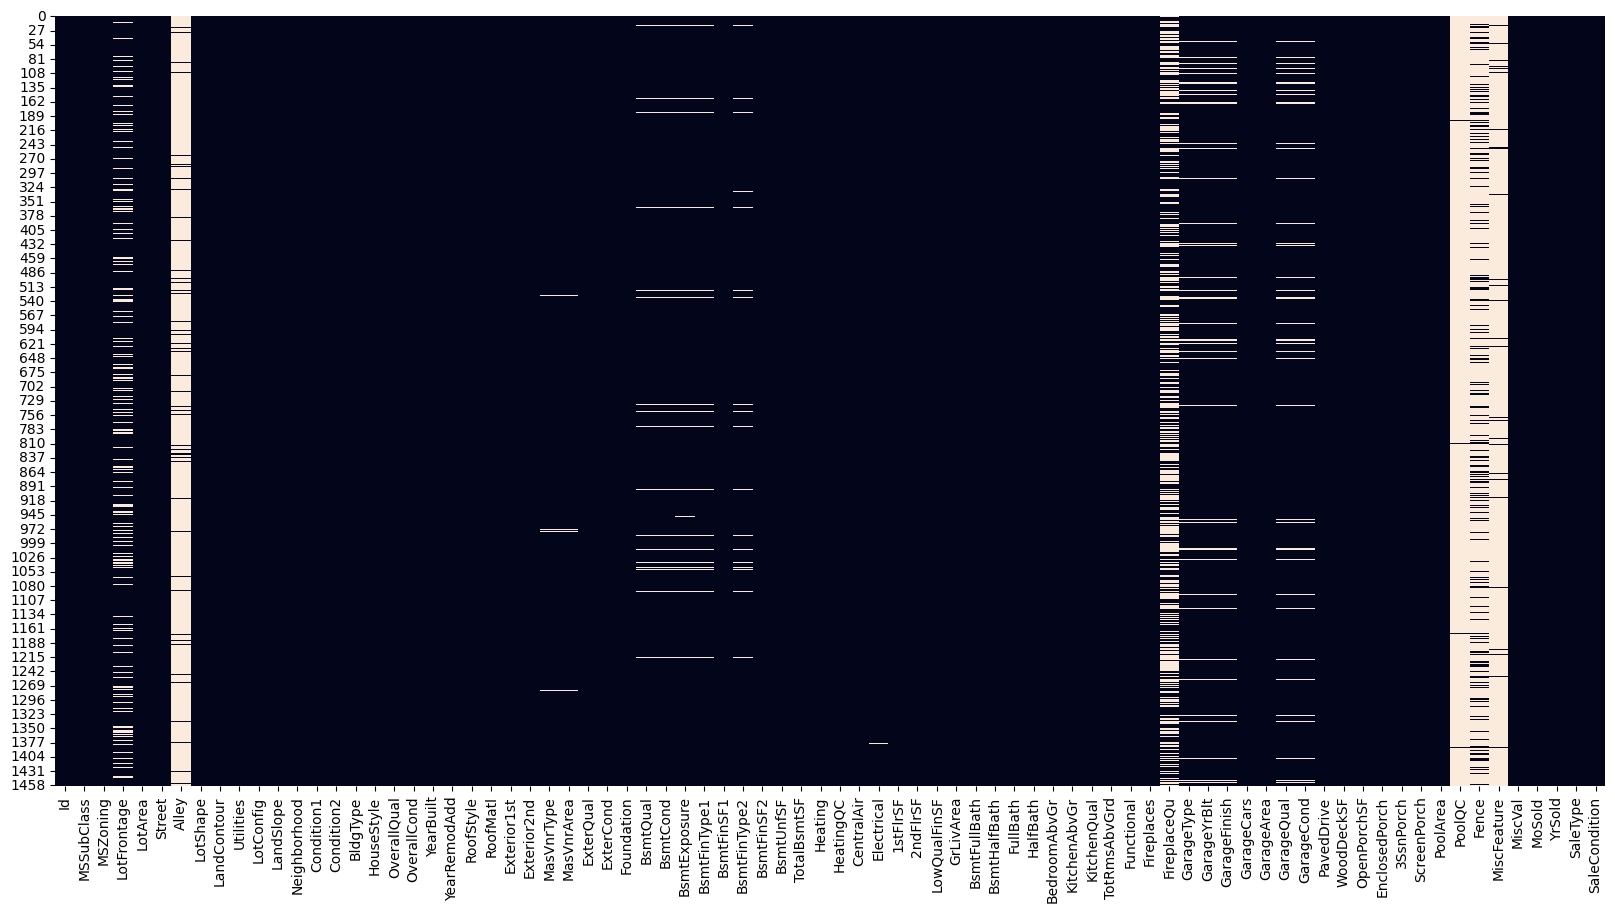

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(X.isnull(), cbar=False)

PoolQC,MiscFeature and Alley missing values are actually where there are no alley or pool etc. so this can be added as this.

In [38]:
for value in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']:
    X[value].fillna('NA',inplace=True)
    X[value].fillna('NA',inplace=True)
    test[value].fillna('NA',inplace=True)
    test[value].fillna('NA',inplace=True)

In [19]:
X.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageFinish      81
GarageQual        81
                ... 
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
SaleCondition      0
Length: 80, dtype: int64

__Numeric Values__

In [24]:
X.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [28]:
numeric_values=X.select_dtypes(include=['int64','float64'])
numeric_na=numeric_values.isna().sum().sort_values(ascending=False)
numeric_na[numeric_na>0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

__Categoric Values__

In [44]:
categoric_values=X.select_dtypes(include='object').nunique()
categoric_values_large=categoric_values[categoric_values>=7].sort_values(ascending=False)
X.drop(categoric_values_large)
test.drop(categoric_values_large)
print(X.shape)
print(test.shape)

(1460, 80)
(1459, 80)


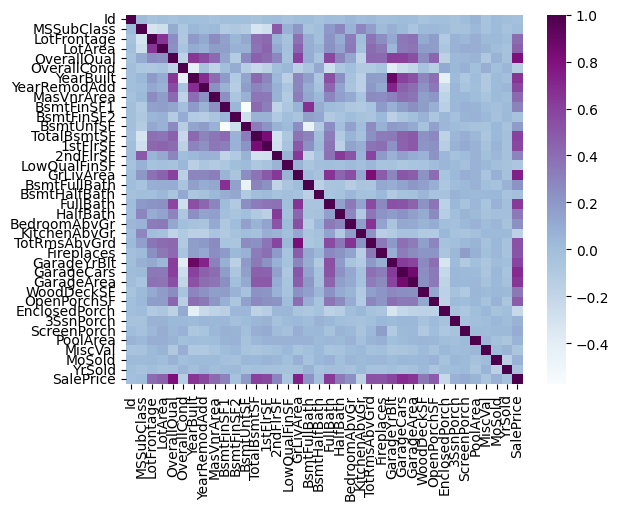

In [31]:
correlation_matrix = data.corr('spearman')
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= 'BuPu');